# Exploratory Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings("ignore")

from acquire import get_titanic_data, get_iris_data
from prepare import prep_iris

import seaborn as sns
from sklearn.model_selection import train_test_split
import explore
import acquire
import prepare

## Section 1 - iris_db

### Acquire, prepare, and split your data.

**Acquire**

In [7]:
df = acquire.get_iris_data()
df.head()

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2
2,1,setosa,4.7,3.2,1.3,0.2
3,1,setosa,4.6,3.1,1.5,0.2
4,1,setosa,5.0,3.6,1.4,0.2


**Prepare**

In [8]:
df = prepare.prep_iris(df)
df.head()

,species,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
0,setosa,5.1,3.5,1.4,0.2,0,0
1,setosa,4.9,3.0,1.4,0.2,0,0
2,setosa,4.7,3.2,1.3,0.2,0,0
3,setosa,4.6,3.1,1.5,0.2,0,0
4,setosa,5.0,3.6,1.4,0.2,0,0


**Split**

In [9]:
def train_validate_test_split(df, target, seed=123):
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed, 
                                            stratify=df[target])
    train, validate = train_test_split(train_validate, test_size=0.8, 
                                       random_state=seed,
                                       stratify=train_validate[target])
    return train, validate, test

In [10]:
train, validate, test = train_validate_test_split(df, target='species_versicolor')
train.head(2)

,species,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
56,versicolor,6.3,3.3,4.7,1.6,1,0
3,setosa,4.6,3.1,1.5,0.2,0,0


In [11]:
print(train.shape, validate.shape, test.shape)

(23, 7) (96, 7) (30, 7)


## Univariate Stats

### For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149 entries, 0 to 149
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   species             149 non-null    object 
 1   sepal_length        149 non-null    float64
 2   sepal_width         149 non-null    float64
 3   petal_length        149 non-null    float64
 4   petal_width         149 non-null    float64
 5   species_versicolor  149 non-null    uint8  
 6   species_virginica   149 non-null    uint8  
dtypes: float64(4), object(1), uint8(2)
memory usage: 7.3+ KB


We will define categorical and quantitative variable. 

In [30]:
cat_vars = ['species', 'species_versicolor', 'species_virginica']

In [31]:
quant_vars = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

We have four quantitative variables: sepal length, sepal width, petal length, petal width. 

**Sepal length**

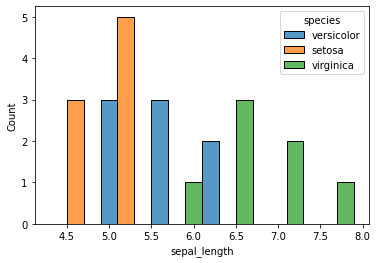

In [85]:
sepal_length_historgram = sns.histplot(data=train, x="sepal_length", hue="species", multiple="dodge")

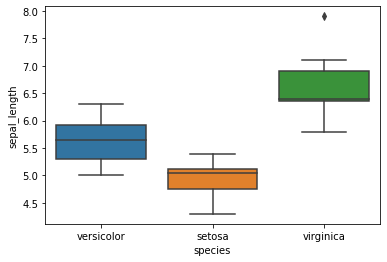

In [86]:
sepal_length_box_plot = sns.boxplot(data=train, x = 'species', y="sepal_length")

In [87]:
train.sepal_length.describe()

count    23.000000
mean      5.704348
std       0.865752
min       4.300000
25%       5.050000
50%       5.600000
75%       6.300000
max       7.900000
Name: sepal_length, dtype: float64

**Sepal width**

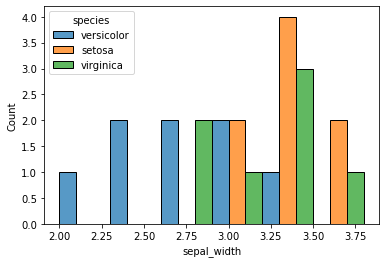

In [88]:
sepal_width_histogram = sns.histplot(data=train, x="sepal_width", hue="species", multiple = 'dodge')

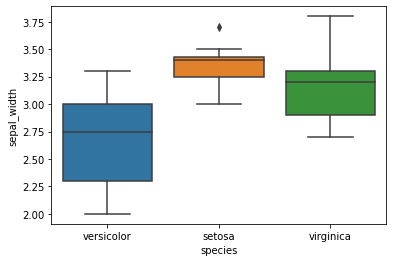

In [89]:
sepal_width_boxplot = sns.boxplot(data = train, x = 'species', y = 'sepal_width')

In [90]:
train.sepal_width.describe()

count    23.000000
mean      3.056522
std       0.449066
min       2.000000
25%       2.800000
50%       3.100000
75%       3.350000
max       3.800000
Name: sepal_width, dtype: float64

**Petal length**

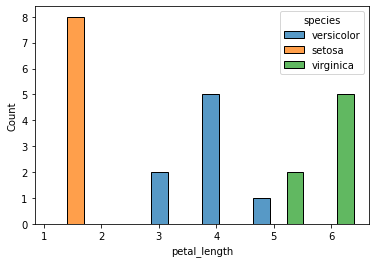

In [91]:
petal_length_histogram = sns.histplot(data=train, x="petal_length", hue="species", multiple="dodge")

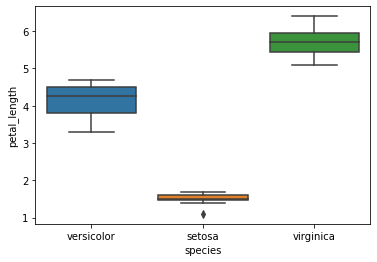

In [92]:
petal_length_boxplot = sns.boxplot(data=train, x='species', y='petal_length')

In [93]:
train.petal_length.describe()

count    23.000000
mean      3.686957
std       1.810400
min       1.100000
25%       1.600000
50%       4.100000
75%       5.200000
max       6.400000
Name: petal_length, dtype: float64

**Petal width**

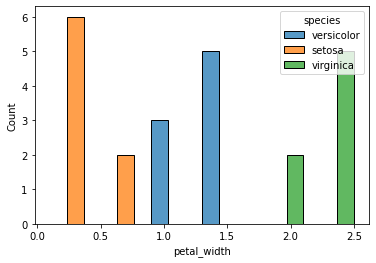

In [94]:
petal_width_histogram = sns.histplot(data=train, x="petal_width", hue="species", multiple="dodge")

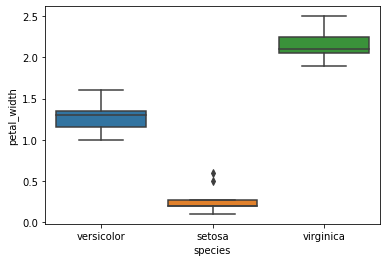

In [95]:
petal_width_boxplot = sns.boxplot(data=train, x='species', y ='petal_width')

In [96]:
train.petal_width.describe()

count    23.000000
mean      1.195652
std       0.799704
min       0.100000
25%       0.350000
50%       1.300000
75%       1.950000
max       2.500000
Name: petal_width, dtype: float64

### For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

In [25]:
species_counts = train.species.value_counts()

In [26]:
df_species_counts = pd.DataFrame(species_counts)
df_species_counts

,species
setosa,8
versicolor,8
virginica,7


In [27]:
df_species_counts = df_species_counts.rename(columns = {"species" : "count"})
df_species_counts.columns.names = ['species']

In [28]:
df_species_counts

species,count
setosa,8
versicolor,8
virginica,7


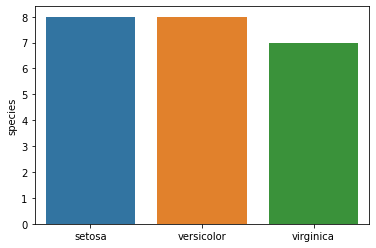

In [36]:
species_value_counts = sns.barplot(x=species_counts.index, y=species_counts)

**We can also solve this problem using the explore function given to us.**

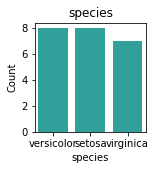

               species  Count  Percent
versicolor  versicolor      8    34.78
setosa          setosa      8    34.78
virginica    virginica      7    30.43
_________________________________________________________________


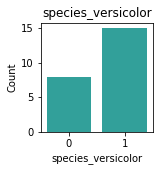

   species_versicolor  Count  Percent
0                   1     15    65.22
1                   0      8    34.78
_________________________________________________________________


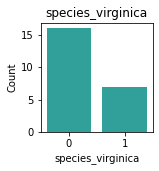

   species_virginica  Count  Percent
0                  0     16    69.57
1                  1      7    30.43
_________________________________________________________________


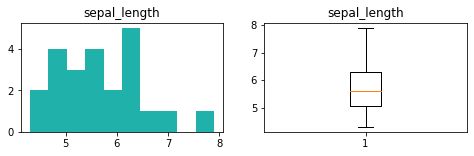

count    23.000000
mean      5.704348
std       0.865752
min       4.300000
25%       5.050000
50%       5.600000
75%       6.300000
max       7.900000
Name: sepal_length, dtype: float64


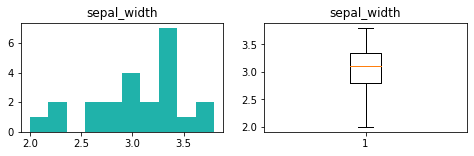

count    23.000000
mean      3.056522
std       0.449066
min       2.000000
25%       2.800000
50%       3.100000
75%       3.350000
max       3.800000
Name: sepal_width, dtype: float64


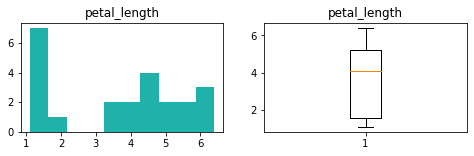

count    23.000000
mean      3.686957
std       1.810400
min       1.100000
25%       1.600000
50%       4.100000
75%       5.200000
max       6.400000
Name: petal_length, dtype: float64


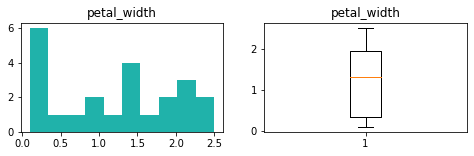

count    23.000000
mean      1.195652
std       0.799704
min       0.100000
25%       0.350000
50%       1.300000
75%       1.950000
max       2.500000
Name: petal_width, dtype: float64


In [17]:
explore.explore_univariate(train, cat_vars, quant_vars)

### Document any key takeaways and actions. 

There is roughly even amount of species. None of the quantitative data looks normally distributed.

## Bivariate Stats

### Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

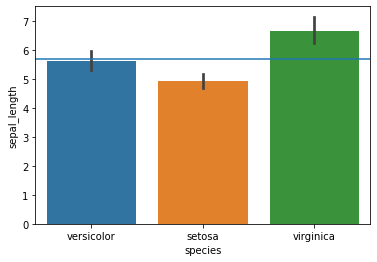

In [60]:
sepal_length_species = sns.barplot(data=train, x = 'species', y =
'sepal_length') 
average = (train["sepal_length"].sum())/(len(train["sepal_length"]))
sepal_length_species.axhline(average)

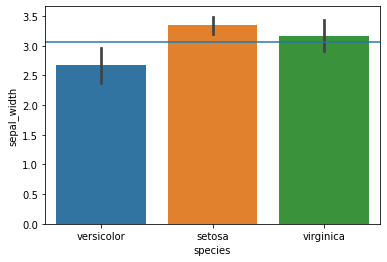

In [61]:
sepal_width_species = sns.barplot(data=train, x = 'species', y =
'sepal_width') 
average = train['sepal_width'].mean()
sepal_width_species.axhline(average)

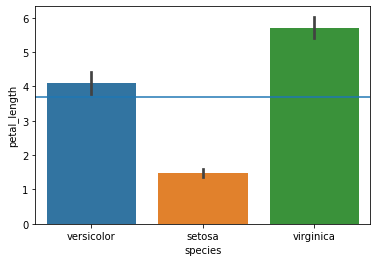

In [62]:
petal_length_species = sns.barplot(data=train, x = 'species', y =
'petal_length') 
average = train['petal_length'].mean()
petal_length_species.axhline(average)

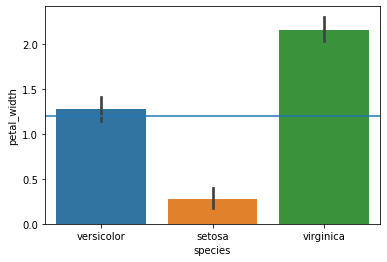

In [63]:
petal_width_species = sns.barplot(data=train, x = 'species', y =
'petal_width') 
average = train['petal_width'].mean()
petal_width_species.axhline(average)

### For each measurement type, compute the descriptive statistics for each species.

In [85]:
descriptive_sepal_length = train.groupby("species")["sepal_length"].describe()

In [86]:
descriptive_sepal_width = train.groupby("species")["sepal_width"].describe()

In [87]:
descriptive_petal_length = train.groupby("species")["petal_length"].describe()

In [88]:
descriptive_petal_length = train.groupby("species")["petal_width"].describe()

In [89]:
descriptive_sepal_length

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
setosa,8.0,4.937500,0.354310,4.3,4.75,5.05,5.125,5.4
versicolor,8.0,5.637500,0.504090,5.0,5.30,5.65,5.925,6.3
virginica,7.0,6.657143,0.675419,5.8,6.35,6.40,6.900,7.9


In [90]:
descriptive_sepal_width

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
setosa,8.0,3.350000,0.220389,3.0,3.25,3.40,3.425,3.7
versicolor,8.0,2.675000,0.439968,2.0,2.30,2.75,3.000,3.3
virginica,7.0,3.157143,0.369040,2.7,2.90,3.20,3.300,3.8


In [91]:
descriptive_petal_length

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
setosa,8.0,0.275000,0.175255,0.1,0.20,0.2,0.275,0.6
versicolor,8.0,1.275000,0.212132,1.0,1.15,1.3,1.350,1.6
virginica,7.0,2.157143,0.198806,1.9,2.05,2.1,2.250,2.5


In [92]:
descriptive_petal_length

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
setosa,8.0,0.275000,0.175255,0.1,0.20,0.2,0.275,0.6
versicolor,8.0,1.275000,0.212132,1.0,1.15,1.3,1.350,1.6
virginica,7.0,2.157143,0.198806,1.9,2.05,2.1,2.250,2.5


### For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

In [98]:
from scipy.stats import mannwhitneyu
from scipy import stats

In [104]:
x = train[train["species"] == "virginica"]
y = train[train["species"] == "versicolor"]

In [105]:
stats.mannwhitneyu(x['petal_width'], y['petal_width'], use_continuity=True)

MannwhitneyuResult(statistic=0.0, pvalue=0.0006878678923405625)

In [106]:
stats.mannwhitneyu(x['sepal_length'], y['sepal_length'], use_continuity=True)

MannwhitneyuResult(statistic=3.5, pvalue=0.002595115141281533)

In [107]:
stats.mannwhitneyu(x['sepal_width'], y['sepal_width'], use_continuity=True)

MannwhitneyuResult(statistic=12.0, pvalue=0.03501954738174966)

In [108]:
stats.mannwhitneyu(x['petal_length'], y['petal_length'], use_continuity=True)

MannwhitneyuResult(statistic=0.0, pvalue=0.0007228903504473763)

There is a significant difference between the two groups for every category except sepal width.

### Document takeaways & any actions

There are huge differences in petal length and width among species, a minor difference in sepal length, and no difference in sepal width.

## Multivariate Stats

### Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.

In [111]:
train.head()

,species,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
56,versicolor,6.3,3.3,4.7,1.6,1,0
3,setosa,4.6,3.1,1.5,0.2,0,0
23,setosa,5.1,3.3,1.7,0.5,0,0
102,virginica,7.1,3.0,5.9,2.1,0,1
39,setosa,5.1,3.4,1.5,0.2,0,0


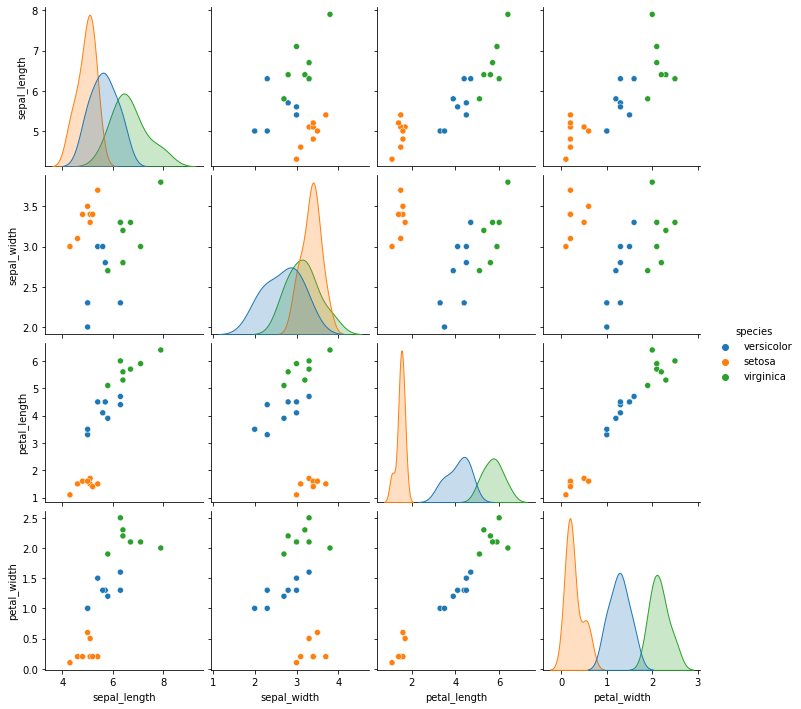

In [115]:
train_pairplot = sns.pairplot(train.iloc[:,:-2], hue="species")

### Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

In [118]:
train_tidy = train.iloc[:,:-2].melt(id_vars=['species'], var_name = "measurement", value_name = "value")

In [120]:
train_tidy.head()

,species,measurement,value
0,versicolor,sepal_length,6.3
1,setosa,sepal_length,4.6
2,setosa,sepal_length,5.1
3,virginica,sepal_length,7.1
4,setosa,sepal_length,5.1


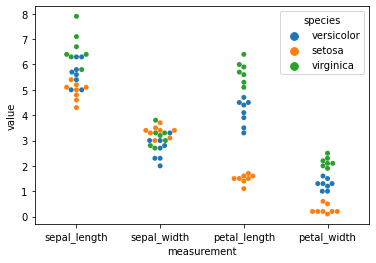

In [123]:
iris_train_data_swarmplot = sns.swarmplot(x="measurement", y="value", data=train_tidy, hue = 'species')

### Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).

My question: is petal area significant different in versicolor compared to in virginica?

$H_0:$ There is no difference between versicolor mean petal area and virginica mean petal area.

$H_{a}:$ There is a significnat difference between versicolor mean petal area and virginica mean petal area.

In [124]:
train.head()

,species,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
56,versicolor,6.3,3.3,4.7,1.6,1,0
3,setosa,4.6,3.1,1.5,0.2,0,0
23,setosa,5.1,3.3,1.7,0.5,0,0
102,virginica,7.1,3.0,5.9,2.1,0,1
39,setosa,5.1,3.4,1.5,0.2,0,0


In [125]:
train['petal_area'] = train['petal_length'] * train ['petal_width']

In [127]:
train.head()

,species,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica,petal_area
56,versicolor,6.3,3.3,4.7,1.6,1,0,7.52
3,setosa,4.6,3.1,1.5,0.2,0,0,0.30
23,setosa,5.1,3.3,1.7,0.5,0,0,0.85
102,virginica,7.1,3.0,5.9,2.1,0,1,12.39
39,setosa,5.1,3.4,1.5,0.2,0,0,0.30


In [128]:
x = train[train["species"] == "virginica"]
y = train[train["species"] == "versicolor"]

In [129]:
stats.mannwhitneyu(x['petal_area'], y['petal_area'], use_continuity=True)

MannwhitneyuResult(statistic=0.0, pvalue=0.0007300309581211239)

We reject the null hypothesis. There is a significant difference between virginica petal area and versicolor petal area.

### Document takeaways and any actions.

Petal width values appear to have the widest distribution of any measurement.

## We will get some extra practice with the Telco dataset.

In [2]:
from acquire import get_telco_data
from prepare import prep_telco
from sklearn.model_selection import train_test_split

In [3]:
telco = get_telco_data()

In [4]:
telco.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,payment_type_id,monthly_charges,total_charges,churn,contract_type_id,contract_type,internet_service_type_id,internet_service_type,payment_type_id,payment_type
0,0016-QLJIS,Female,0,Yes,Yes,65,Yes,Yes,1,Yes,...,2,90.45,5957.9,No,3,Two year,1,DSL,2,Mailed check
1,0017-DINOC,Male,0,No,No,54,No,No phone service,1,Yes,...,4,45.20,2460.55,No,3,Two year,1,DSL,4,Credit card (automatic)
2,0019-GFNTW,Female,0,No,No,56,No,No phone service,1,Yes,...,3,45.05,2560.1,No,3,Two year,1,DSL,3,Bank transfer (automatic)
3,0056-EPFBG,Male,0,Yes,Yes,20,No,No phone service,1,Yes,...,4,39.40,825.4,No,3,Two year,1,DSL,4,Credit card (automatic)
4,0078-XZMHT,Male,0,Yes,No,72,Yes,Yes,1,No,...,3,85.15,6316.2,No,3,Two year,1,DSL,3,Bank transfer (automatic)


In [5]:
telco["has_churned"] = telco.churn.replace(to_replace=['No', 'Yes'], value=[0, 1])

In [6]:
telco.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,monthly_charges,total_charges,churn,contract_type_id,contract_type,internet_service_type_id,internet_service_type,payment_type_id,payment_type,has_churned
0,0016-QLJIS,Female,0,Yes,Yes,65,Yes,Yes,1,Yes,...,90.45,5957.9,No,3,Two year,1,DSL,2,Mailed check,0
1,0017-DINOC,Male,0,No,No,54,No,No phone service,1,Yes,...,45.20,2460.55,No,3,Two year,1,DSL,4,Credit card (automatic),0
2,0019-GFNTW,Female,0,No,No,56,No,No phone service,1,Yes,...,45.05,2560.1,No,3,Two year,1,DSL,3,Bank transfer (automatic),0
3,0056-EPFBG,Male,0,Yes,Yes,20,No,No phone service,1,Yes,...,39.40,825.4,No,3,Two year,1,DSL,4,Credit card (automatic),0
4,0078-XZMHT,Male,0,Yes,No,72,Yes,Yes,1,No,...,85.15,6316.2,No,3,Two year,1,DSL,3,Bank transfer (automatic),0


In [7]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               7043 non-null   object 
 1   gender                    7043 non-null   object 
 2   senior_citizen            7043 non-null   int64  
 3   partner                   7043 non-null   object 
 4   dependents                7043 non-null   object 
 5   tenure                    7043 non-null   int64  
 6   phone_service             7043 non-null   object 
 7   multiple_lines            7043 non-null   object 
 8   internet_service_type_id  7043 non-null   int64  
 9   online_security           7043 non-null   object 
 10  online_backup             7043 non-null   object 
 11  device_protection         7043 non-null   object 
 12  tech_support              7043 non-null   object 
 13  streaming_tv              7043 non-null   object 
 14  streamin

In [10]:
telco = prep_telco(telco)

**Split**

In [10]:
def split_data(df):
    train_validate, test = train_test_split(df, test_size=.2, random_state=123, stratify=df.churn)
    train, validate = train_test_split(train_validate, 
                                       test_size=.3, 
                                       random_state=123, 
                                       stratify=train_validate.churn)
    return train, validate, test

In [11]:
train, validate, test = split_data(telco)

In [12]:
train.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,monthly_charges,total_charges,churn,contract_type_id,contract_type,internet_service_type_id,internet_service_type,payment_type_id,payment_type,has_churned
5642,1982-FEBTD,Female,0,Yes,Yes,23,Yes,Yes,3,No internet service,...,25.60,514.75,No,3,Two year,3,None,4,Credit card (automatic),0
3338,8982-NHAVY,Male,0,No,No,27,Yes,Yes,2,No,...,100.50,2673.45,No,2,One year,2,Fiber optic,3,Bank transfer (automatic),0
4273,4115-NZRKS,Female,1,No,No,7,Yes,No,2,No,...,89.15,574.35,No,1,Month-to-month,2,Fiber optic,1,Electronic check,0
2382,9633-DENPU,Female,0,Yes,No,47,Yes,No,1,No,...,58.60,2723.4,No,1,Month-to-month,1,DSL,3,Bank transfer (automatic),0
2655,5693-PIPCS,Male,0,No,No,41,Yes,No,2,No,...,99.65,4220.35,No,3,Two year,2,Fiber optic,4,Credit card (automatic),0


In [13]:
train.size

110404

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3943 entries, 5642 to 6840
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               3943 non-null   object 
 1   gender                    3943 non-null   object 
 2   senior_citizen            3943 non-null   int64  
 3   partner                   3943 non-null   object 
 4   dependents                3943 non-null   object 
 5   tenure                    3943 non-null   int64  
 6   phone_service             3943 non-null   object 
 7   multiple_lines            3943 non-null   object 
 8   internet_service_type_id  3943 non-null   int64  
 9   online_security           3943 non-null   object 
 10  online_backup             3943 non-null   object 
 11  device_protection         3943 non-null   object 
 12  tech_support              3943 non-null   object 
 13  streaming_tv              3943 non-null   object 
 14  strea

In [15]:
cat_vars = ['gender', 'senior_citizen', 'partner', 'dependents', 'phone_service']

In [16]:
quant_vars = ['tenure', 'monthly_charges', 'total_charges']

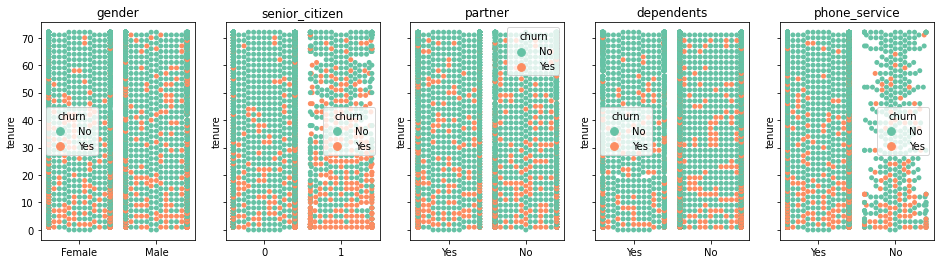

In [ ]:
target = 'churn'

explore.explore_multivariate(train, target, cat_vars, quant_vars)